# Bar Charts

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# To render plots directly on the notebook
%matplotlib inline

In [6]:
pokemon = pd.read_csv("pokemon.csv")
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


### Absolute Frequencies

TIP: semicolon at the end will supress the chart information

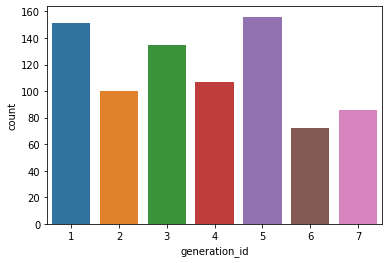

In [9]:
sb.countplot(data=pokemon, x='generation_id');

In [10]:
# to get the default color palette used for plotting
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

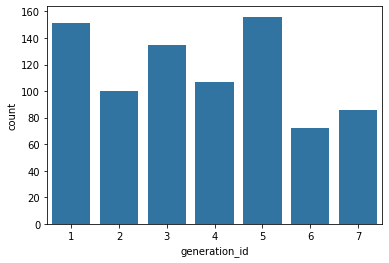

In [12]:
# Plot only using one color
base_color = sb.color_palette()[0]
sb.countplot(data=pokemon, x='generation_id', color=base_color)

### Sort by number of pokemon species introduced in a generation

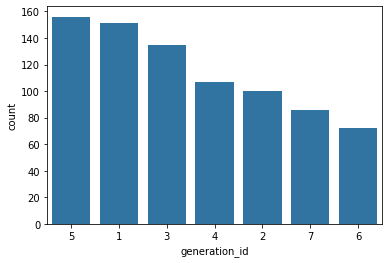

In [16]:
# use pandas function to count -> frequency 
gen_order = pokemon['generation_id'].value_counts().index
sb.countplot(data=pokemon, x='generation_id', color=base_color, order = gen_order)

### Rotating Bar charts

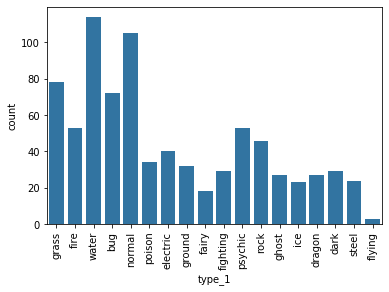

In [24]:
# Rotate labels in Matlab using xticks label
sb.countplot(data=pokemon, x='type_1', color=base_color);
plt.xticks(rotation=90);

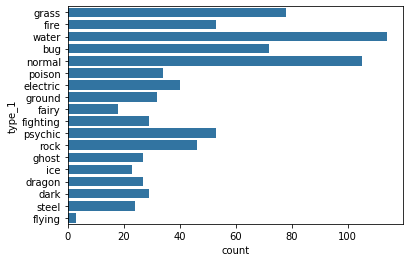

In [29]:
# Horizontal bar chart in Seaborn using "y" label
sb.countplot(data=pokemon, y='type_1', color=base_color);

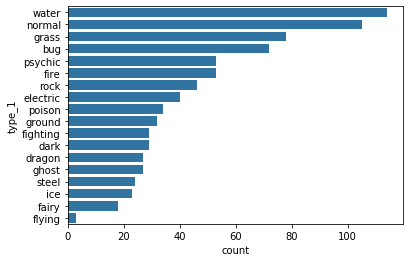

In [28]:
# sorted horizontal chart
type_order = pokemon["type_1"].value_counts().index
sb.countplot(data=pokemon, y='type_1', color=base_color, order = type_order);

# Relative Frequencies

**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

**QUESTION: What proportion of pokemon is each type ?**

In [31]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head(10)

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


Text(0.5, 0, 'proportion')

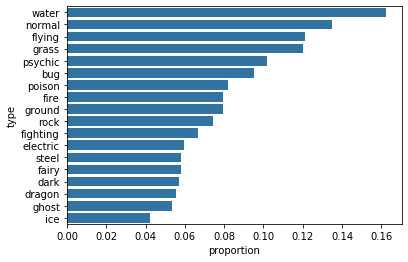

In [50]:
# get order of bars by frequency
type_counts = pkmn_types["type"].value_counts()
type_order = types_count.index

# compute largest proportion
n_pokemon = pkmn_types['species'].unique().shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon

# establish tick locations and create plot
base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
# The counts are still in absolute value , so we display x axis also in counts not relative freq
# only teh label shows relative freq
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')



### plt.text()

https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.text.html 

Powerful matplotlib feature !! text can be generated and printed in a FOR LOOP

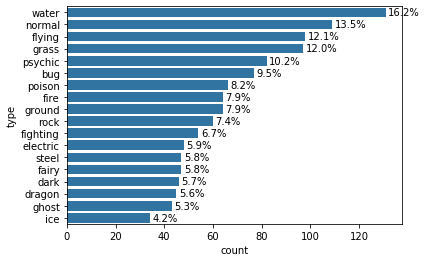

In [57]:
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_text = '{:0.1f}%'.format((count/n_pokemon)*100)    
    plt.text(count+1, i, pct_text, va='center');

PRACTICE:

In [53]:
print(pkmn_types.shape)
pkmn_types["species"].unique().shape[0]

print(type_counts)

print(range(type_counts.shape[0]))

np.arange(0, max_prop, 0.02)

(1212, 4)
water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64
range(0, 18)


array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

In [55]:
y_position = list(range(type_counts.shape[0]))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]